In [5]:
import yfinance as yf

tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "SPY", "BND"]

data = yf.download(
    tickers,
    start="2015-01-01",
    end="2026-01-01",
    auto_adjust=False
)

prices = data["Adj Close"]




[*********************100%***********************]  6 of 6 completed


In [6]:
prices.head()
prices.columns
prices.index


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2025-12-17', '2025-12-18', '2025-12-19', '2025-12-22',
               '2025-12-23', '2025-12-24', '2025-12-26', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', name='Date', length=2766, freq=None)

- Define the Backtesting Period

In [7]:
backtest_start = "2025-01-01"
backtest_end   = "2026-01-01"

prices_bt = prices.loc[backtest_start:backtest_end]
returns_bt = prices_bt.pct_change().dropna()


- Define the Benchmark Portfolio (60/40)

In [9]:
benchmark_weights = {
    "SPY": 0.6,
    "BND": 0.4
}


In [11]:
import pandas as pd
benchmark_returns = (
    returns_bt[list(benchmark_weights.keys())]
    @ pd.Series(benchmark_weights)
)


- Simulate Your Strategy Portfolio

In [12]:
strategy_weights = {
    "AAPL": 0.25,
    "MSFT": 0.20,
    "GOOGL": 0.15,
    "AMZN": 0.15,
    "SPY": 0.25
}


In [13]:
strategy_returns = (
    returns_bt[list(strategy_weights.keys())]
    @ pd.Series(strategy_weights)
)


- Compute Cumulative Returns

In [14]:
strategy_cum = (1 + strategy_returns).cumprod()
benchmark_cum = (1 + benchmark_returns).cumprod()


- Plot Strategy vs Benchmark

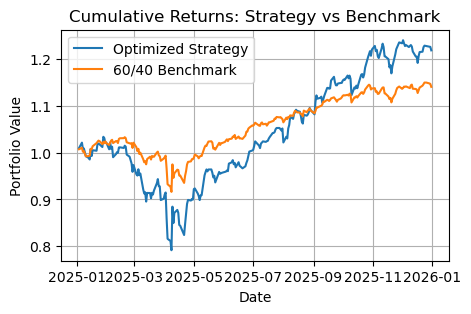

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(strategy_cum, label="Optimized Strategy")
plt.plot(benchmark_cum, label="60/40 Benchmark")
plt.title("Cumulative Returns: Strategy vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()


The benchmark portfolio demonstrates a smoother and more stable growth pattern, with smaller fluctuations and a shallower drawdown. It ends the year at a lower cumulative value (approximately 1.14).

Axes Interpretation:

The Y-axis represents portfolio value relative to an initial investment of 1.0.

The X-axis represents time over the one-year backtesting period.

Overall, the chart highlights a risk–return trade-off: the optimized strategy achieves higher returns but at the cost of increased volatility and deeper drawdowns

- Performance Metrics

In [17]:
import numpy as np

def annualized_return(returns, periods_per_year=252):
    return (1 + returns.mean()) ** periods_per_year - 1

def sharpe_ratio(returns, risk_free_rate=0.0, periods_per_year=252):
    excess_returns = returns - risk_free_rate / periods_per_year
    return np.sqrt(periods_per_year) * excess_returns.mean() / excess_returns.std()

def max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()


In [18]:
metrics = pd.DataFrame({
    "Strategy": [
        strategy_cum.iloc[-1] - 1,
        annualized_return(strategy_returns),
        sharpe_ratio(strategy_returns),
        max_drawdown(strategy_cum)
    ],
    "Benchmark": [
        benchmark_cum.iloc[-1] - 1,
        annualized_return(benchmark_returns),
        sharpe_ratio(benchmark_returns),
        max_drawdown(benchmark_cum)
    ]
}, index=[
    "Total Return",
    "Annualized Return",
    "Sharpe Ratio",
    "Max Drawdown"
])

metrics


,Strategy,Benchmark
Total Return,0.217865,0.140015
Annualized Return,0.252738,0.149977
Sharpe Ratio,0.982103,1.164331
Max Drawdown,-0.234020,-0.112888


# Strategy Viability Conclusion
The backtesting results indicate that the optimized portfolio outperformed the 60/40 benchmark in terms of both total and annualized returns over the evaluation period. The strategy achieved a total return of 21.8%, compared to 14.0% for the benchmark, demonstrating the potential value of a model-driven portfolio optimization approach. However, this higher return came with increased volatility, as reflected in the lower Sharpe Ratio and significantly larger maximum drawdown.

This initial backtest suggests that the strategy may be suitable for investors with a higher risk tolerance who prioritize return maximization over capital preservation. Nevertheless, the results should be interpreted with caution due to several limitations, including the short backtesting horizon, the absence of transaction costs, and the use of static portfolio weights. Future improvements should include longer evaluation periods, rolling re-optimization, and robustness testing to better assess the strategy’s real-world viability.